In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.proportion import proportions_ztest
from tqdm.notebook import tqdm
#Пропущенные данные
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer
#Препроцессинг
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.linear_model import ElasticNet, BayesianRidge, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
# import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

from sklearn.linear_model import ElasticNet, BayesianRidge, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_absolute_percentage_error

### Область работы 2 (выполнение лучшей модели)

In [4]:
# Путь к тренировочному набору
path_train = 'train_house_A.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test_house_A.csv' # содержит только имя файла, без имен папок

In [5]:
# Блок(и) обучения и поверки модели

In [6]:
df = pd.read_csv(path_train)
df2 = pd.read_csv(path_test)
to_dropp = ['0', '1', '12', '20', '28', '8', '9']

df = df.drop(columns = to_dropp)
df2 = df2.drop(columns = to_dropp)
col = df.columns
print('будем использовать', col)


pipe = Pipeline(steps=[
    ('preproc', StandardScaler()),
    ('estimator', RandomForestRegressor(n_estimators= 10000,n_jobs = -1, warm_start = True, max_features = 'sqrt', random_state = 42))
    ])




y = df.price
X = df.drop(columns =['price'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

pipe.fit(X_train,y_train)
mean_absolute_percentage_error(y_test, pipe.predict(X_test))

будем использовать Index(['price', '2', '3', '4', '5', '6', '7', '10', '11', '13', '14', '15',
       '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27'],
      dtype='object')


0.17819115716220646

In [7]:
# Блок предсказания с использованием тестового набора

In [8]:
pipe.fit(X,y)
pipe.predict(df2)

/Users/macbook2019/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


array([5572182.847, 6423710.496, 3541599.88 , 4944472.75 , 4117767.395,
       3768673.65 , 7694137.374, 7217044.828, 3901978.094, 6865793.13 ,
       7357537.95 , 3850974.365, 4222327.074, 4134327.624, 3916248.735,
       7656131.973, 5126418.934, 5616934.316, 4577560.855, 6910409.506,
       3552747.345, 4374721.351, 5332793.48 , 4356183.825, 3943027.165,
       3975737.255, 5374247.438, 3606758.015, 3041225.845, 4607577.415,
       3570612.115, 6679510.495, 4937520.98 , 4555176.059, 5259751.602,
       3298901.55 , 4088664.86 , 3643769.101, 5129808.005, 5662509.944,
       5578584.858, 4206230.364, 7099409.786, 4024746.432, 3255375.69 ,
       5764259.984, 4831520.309, 3179110.865, 5161555.308, 3106617.654,
       4684440.362, 3063345.67 , 6156389.197, 4955547.842, 3219766.095,
       5450233.278, 5816241.312, 4642148.21 , 3362250.549, 6495573.798,
       7220658.382, 4197352.53 , 3641202.299, 4662866.355, 6526257.171,
       5548217.738, 4008335.765, 3948442.715, 3509658.18 , 72644

In [9]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = pipe.predict(df2)
print(y_predict.shape,df2.shape)

(137,) (137, 22)


(137,) (137,)
Отрицательные цены -  0
Max Error: 5,959,012
 
----------------------
   MAPE Error: 19.35
----------------------


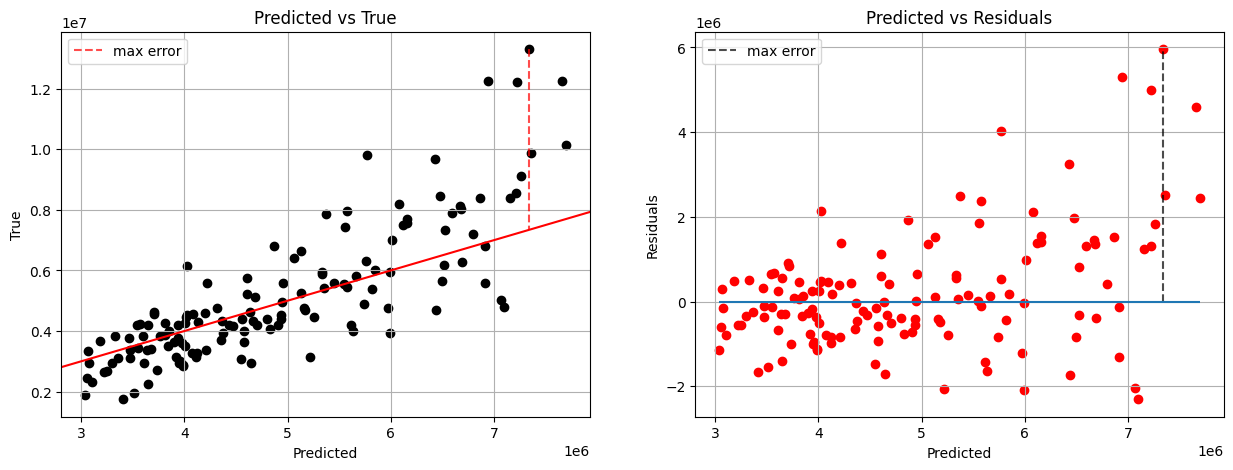

In [10]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_A.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [11]:
mask = df2.columns.values

import pickle
with open('saved_dictionary_a.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,1,1
1,16,airconditioning
2,6,area
3,4,area bathrooms
4,25,area bedrooms
5,10,area stories
6,5,basement
7,7,bathrooms
8,28,bathrooms stories
9,21,bedrooms


In [12]:
df2.columns.values

array(['2', '3', '4', '5', '6', '7', '10', '11', '13', '14', '15', '16',
       '17', '18', '19', '21', '22', '23', '24', '25', '26', '27'],
      dtype=object)